## Training a regression model to predict price of real estate

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df_estate = pd.read_csv(r'C:\Users\pc\Desktop\mydataanalysis\python\jupyterNotebook\instruction\real_estate.csv')
df_estate.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df_estate.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [11]:
# # Generating column

# df_estate[['dyear','moth']] = df_estate['transaction_date'].astype(str).str.split('.',expand=True)

# df_estate['dyear'] = df_estate['dyear'].astype(int)
# df_estate['moth'] = df_estate['moth'].astype(int)
df_estate.head(20)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,dyear,moth
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,833
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,2012,667
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,2012,667
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,2013,417
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,2013,5
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,2013,417


In [44]:
# converting month column 
# df_estate['month'] = 1
# df_estate.loc[df_estate['moth'] == 0 , 'month'] = 12
# df_estate.loc[df_estate['moth'] == 83 , 'month'] = 1
# df_estate.loc[df_estate['moth'] == 917 , 'month'] = 11
# df_estate.loc[df_estate['moth'] == 583 , 'month'] = 7
# df_estate.loc[df_estate['moth'] == 5 , 'month'] = 6
# df_estate.loc[df_estate['moth'] == 417 , 'month'] = 5
# df_estate.loc[df_estate['moth'] == 833 , 'month'] = 10
# df_estate.loc[df_estate['moth'] == 667 , 'month'] = 8
# df_estate.loc[df_estate['moth'] == 25 , 'month'] = 3
# df_estate.loc[df_estate['moth'] == 75 , 'month'] = 9
# df_estate.loc[df_estate['moth'] == 167 , 'month'] = 2
# df_estate.loc[df_estate['moth'] == 333 , 'month'] = 4
# df_estate = df_estate.drop('moth', axis=1)

df_estate.head(20)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,dyear,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,2012,8
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,2012,8
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,2013,5
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,2013,6
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,2013,5


In [27]:
df_estate.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,dyear,month
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,6.251208
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,3.418322
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,1.000000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,4.000000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,6.000000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,9.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,12.000000


## Exploring Data

### Checking for distribution and correlation

Min: 7.60
 Mean: 37.98
 Meadian: 38.45
 Mode: 24.70
 Max: 117.50


Text(0.5, 0.98, 'Distribution')

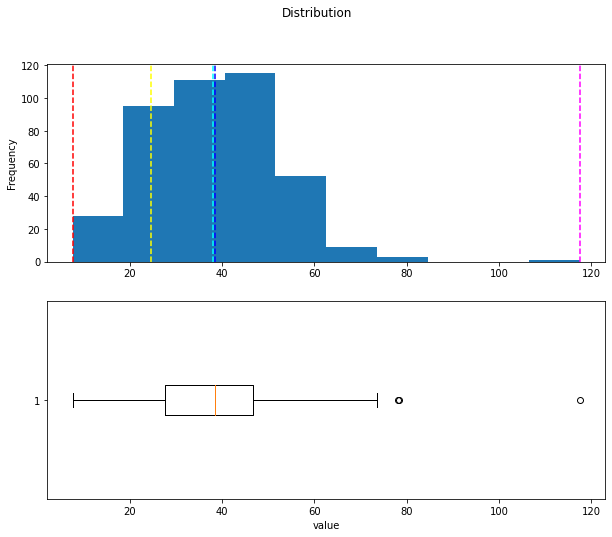

In [28]:
features = ['house_age','transit_distance','local_convenience_stores'] 
vardata = df_estate['price_per_unit']    
minvar = vardata.min()
meanvar = vardata.mean()
meadinvar = vardata.median()
modevar = vardata.mode()[0]
maxvar = vardata.max()
print('Min: {:.2f}\n Mean: {:.2f}\n Meadian: {:.2f}\n Mode: {:.2f}\n Max: {:.2f}'.format(minvar,meanvar,meadinvar,modevar,maxvar))

fig , ax = plt.subplots(2,1,figsize=(10,8))
ax[0].hist(vardata)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=minvar, color='red', linestyle='dashed')
ax[0].axvline(x=meanvar, color='cyan', linestyle='dashed')
ax[0].axvline(x=meadinvar, color='blue', linestyle='dashed')
ax[0].axvline(x=modevar, color='yellow', linestyle='dashed')
ax[0].axvline(x=maxvar, color='magenta', linestyle='dashed')

ax[1].boxplot(vardata, vert=False)
ax[1].set_xlabel('value')
fig.suptitle('Distribution')

### Note:
from the above, we can note that the data contains less outliers so it's save to move the next step.
also, apart from the outliers we can see that the 'price_per_unit' value are slightly distributed in the data.

In [29]:
# Removing outliers
df_estate = df_estate[df_estate['price_per_unit']<70]

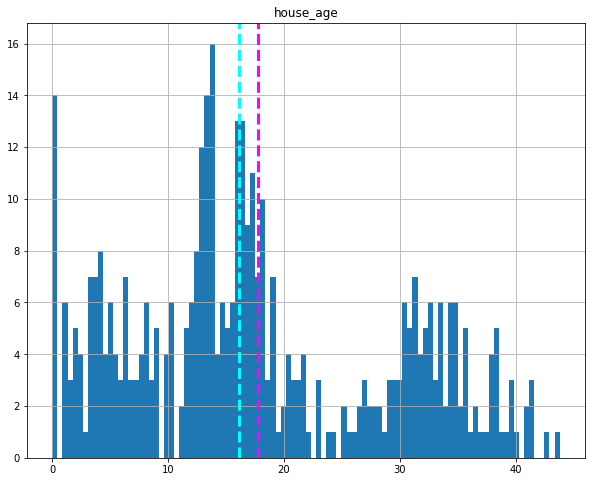

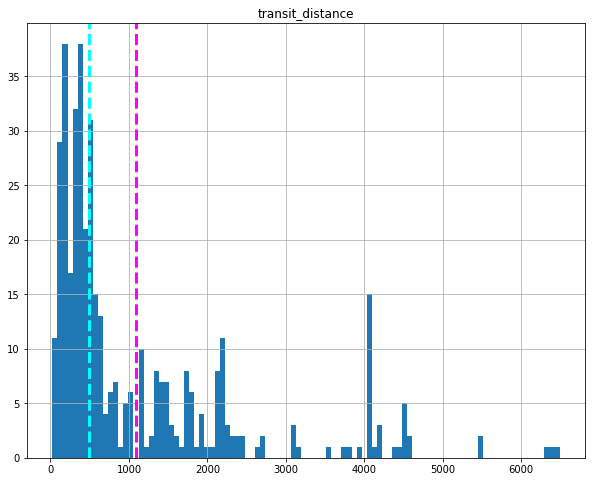

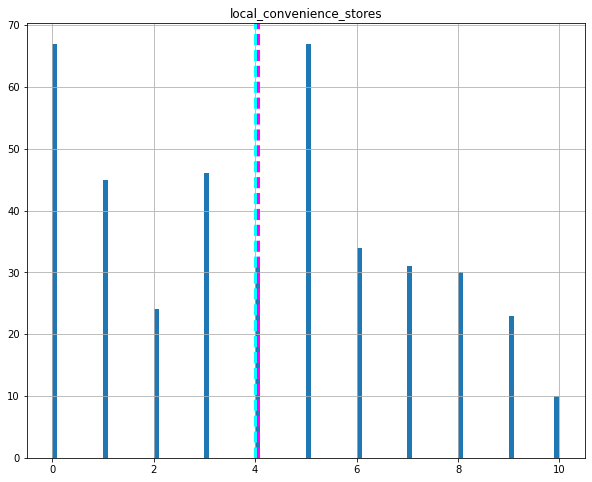

In [30]:
for col in features:
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    feature = df_estate[col]
    feature.hist(bins=100, ax = ax)
    plt.axvline(x=feature.mean(), color='magenta', linestyle='dashed', linewidth=3)
    plt.axvline(x=feature.median(), color='cyan', linestyle='dashed', linewidth=3)
    ax.set_title(col)
plt.show()

### Showing correlation

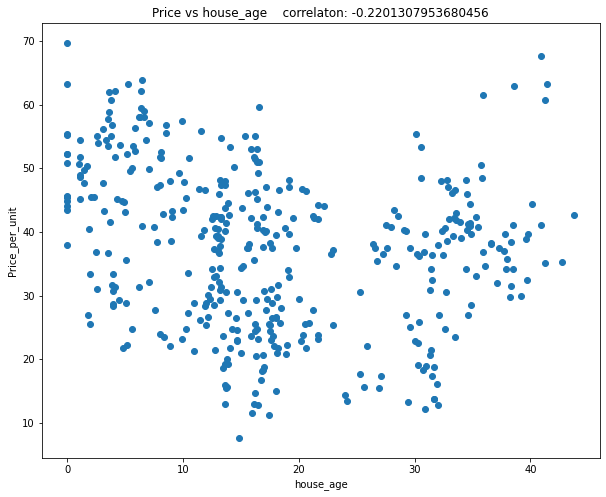

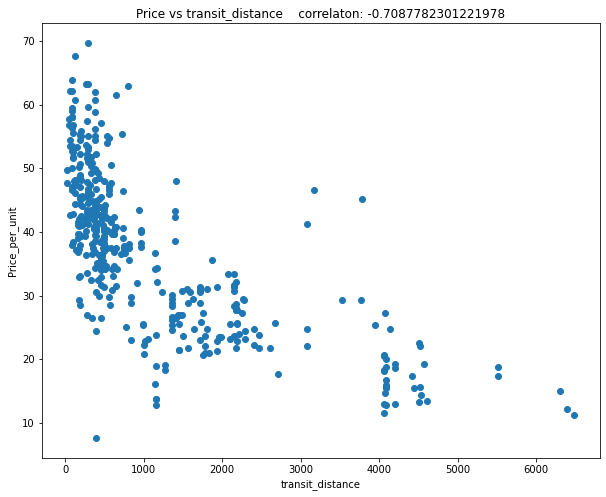

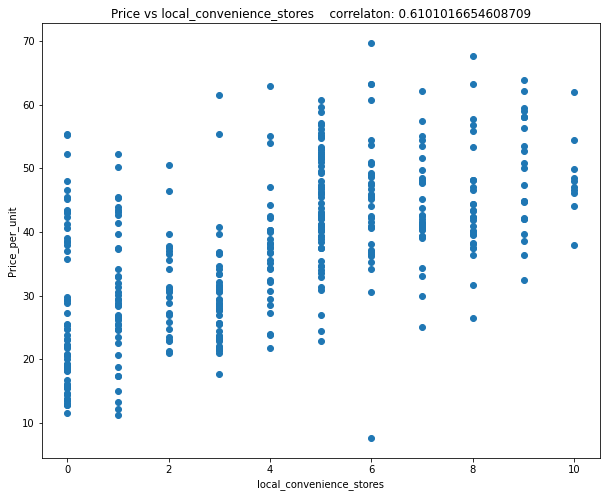

In [31]:
for col in features:
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    feature = df_estate[col]
    label = df_estate['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Price_per_unit')
    ax.set_title('Price vs ' + col + '    correlaton: ' + str(correlation))
plt.show()

### Note:
It's not suprising that the price-per-unit is behaving negatively with house_age and transit_distance because the less the house age the higher the price!.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Creating a model
x,y = df_estate[['house_age','transit_distance','local_convenience_stores']], df_estate['price_per_unit']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=0)
print('Train: %d\n Test: %d'%(x_train.shape[0],x_test.shape[0]))

Train: 285
 Test: 123


In [33]:
model = LinearRegression().fit(x_train,y_train)
print(model)

LinearRegression()


In [34]:
prediction = model.predict(x_test)
np.set_printoptions(suppress=True)
print(f'Prediction: {np.round(prediction[:10])}\n  \nActual: \n{y_test[:10]}')

Prediction: [44. 30. 43. 53. 49. 39. 47. 24. 48. 35.]
  
Actual: 
245    40.8
303    38.4
305    55.0
357    44.9
103    45.7
402    28.5
235    39.3
307    24.7
61     63.2
238    40.6
Name: price_per_unit, dtype: float64


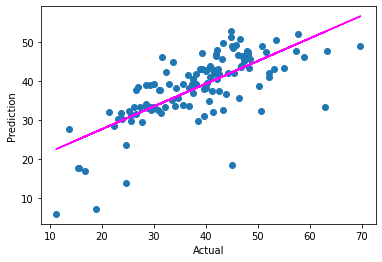

In [35]:
# lets compare
plt.scatter(y_test,prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')

z = np.polyfit(y_test,prediction,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [36]:
# checking evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, prediction)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2score = r2_score(y_test, prediction)
print(f'r2score: {r2score}')

MSE: 56.76595925803291
RMSE: 7.534318765358479
r2score: 0.5156135055782394


### lets try using various other algorithm.

RandomForestRegressor()
MSE: 43.05268204619316
RMSE: 6.5614542630573265
r2score: 0.6326295194446288


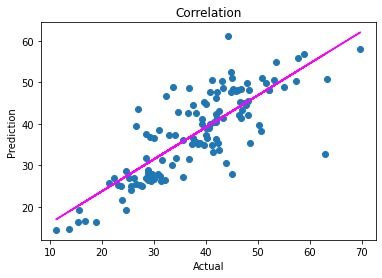

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(x_train,y_train)
print(model)
prediction = model.predict(x_test)

mse = mean_squared_error(y_test, prediction)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2score = r2_score(y_test, prediction)
print(f'r2score: {r2score}')

plt.scatter(y_test,prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Correlation')

z = np.polyfit(y_test,prediction,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Note: the following were also used, but we're not satisfy with the result.

#### Lasso -      Ridge              - DecisionTreeRegressor

GradientBoostingRegressor()
MSE: 47.415315514190894
RMSE: 6.885877977004159
r2score: 0.5954029710055404


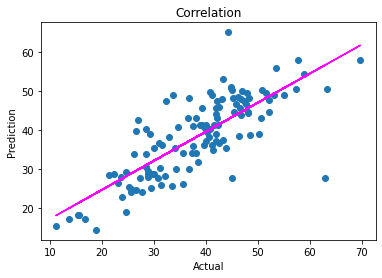

In [38]:
# Using gradientBooster to futher boost our model
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(x_train,y_train)
print(model)
prediction = model.predict(x_test)

mse = mean_squared_error(y_test, prediction)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2score = r2_score(y_test, prediction)
print(f'r2score: {r2score}')

plt.scatter(y_test,prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Correlation')

z = np.polyfit(y_test,prediction,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Using hyperparameter(learnig_rate and estimator) to increase model acuracy

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50)
MSE: 46.922214616548686
RMSE: 6.849979169059472
r2score: 0.5996106232380944


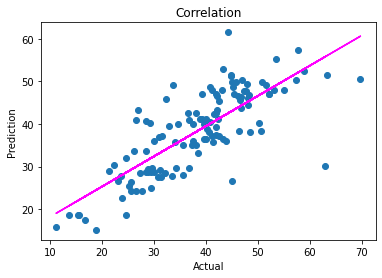

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

algo = GradientBoostingRegressor()
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }
score = make_scorer(r2_score)
gridsearch = GridSearchCV(algo,params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train,y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")
model = gridsearch.best_estimator_
print(model)
prediction = model.predict(x_test)

mse = mean_squared_error(y_test, prediction)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2score = r2_score(y_test, prediction)
print(f'r2score: {r2score}')

plt.scatter(y_test,prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Correlation')

z = np.polyfit(y_test,prediction,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [55]:
df_estate

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,dyear,month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,12
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,2012,8
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,2013,3
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,2013,12


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, -3]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  [-1])])),
                ('regressor', RandomForestRegressor())])
MSE: 44.01232416867648
RMSE: 6.634178484837175
r2score: 0.6244408498672116


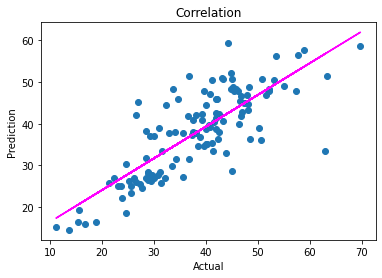

In [60]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

categoryical_features = [-1]
categoryical_tramsformer = Pipeline(steps=[('onehot', OneHotEncoder())])
numeric_features = [0,1,2,-3]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat',categoryical_tramsformer,categoryical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor())])

model = pipeline.fit(x_train, (y_train))
print (model)
prediction = model.predict(x_test)

mse = mean_squared_error(y_test, prediction)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2score = r2_score(y_test, prediction)
print(f'r2score: {r2score}')

plt.scatter(y_test,prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Correlation')

z = np.polyfit(y_test,prediction,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [103]:
import joblib
filename = './real_estate.pkl'
joblib.dump(model,filename)

['./real_estate.pkl']

### Use the model to predict.

In [104]:
load_model = joblib.load(filename)

X_new = np.array([[16.2,289.3248,5],
                  [13.6,4082.015,0]])

results = load_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
47.92
18.64


C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
